In [1]:
import socket
import cv2
import numpy as np
 
#socket에서 수신한 버퍼를 반환하는 함수
def recvall(sock, count):
    # 바이트 문자열
    buf = b''
    while count:
        newbuf = sock.recv(count)
        if not newbuf: return None
        buf += newbuf
        count -= len(newbuf)
    return buf
 
HOST=''
PORT=8485
 
#TCP 사용
s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
print('Socket created')
 
#서버의 아이피와 포트번호 지정
s.bind((HOST,PORT))
print('Socket bind complete')
# 클라이언트의 접속을 기다린다. (클라이언트 연결을 10개까지 받는다)
s.listen(10)
print('Socket now listening')
 
#연결, conn에는 소켓 객체, addr은 소켓에 바인드 된 주소
conn,addr=s.accept()
 
while True:
    check = False
    # 사진 데이터 수신
    for count in range(0,200):
        # client에서 받은 stringData의 크기 (==(str(len(stringData))).encode().ljust(16))
        length = recvall(conn, 16)
        stringData = recvall(conn, int(length))
        data = np.fromstring(stringData, dtype = 'uint8')
    

        #data를 디코딩한다.
        frame = cv2.imdecode(data, cv2.IMREAD_COLOR)

        #화면캡쳐 후 저장
        cv2.imwrite("/home/piai/AI_project/from_pycam/frame%d.jpg" %count, frame)
        print("Saved framed%d.jpg" %count)

        cv2.imshow('ImageWindow', frame)
        #if cv2.waitKey(1) == 27:
        #    break
        
        if count==150:
            check = True
            break
    if check:
        break
    #frame.release()        
cv2.destroyAllWindows()

Socket created
Socket bind complete
Socket now listening


<ipython-input-1-97459a863bbe>:40: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(stringData, dtype = 'uint8')


Saved framed0.jpg
Saved framed1.jpg
Saved framed2.jpg
Saved framed3.jpg
Saved framed4.jpg
Saved framed5.jpg
Saved framed6.jpg
Saved framed7.jpg
Saved framed8.jpg
Saved framed9.jpg
Saved framed10.jpg
Saved framed11.jpg
Saved framed12.jpg
Saved framed13.jpg
Saved framed14.jpg
Saved framed15.jpg
Saved framed16.jpg
Saved framed17.jpg
Saved framed18.jpg
Saved framed19.jpg
Saved framed20.jpg
Saved framed21.jpg
Saved framed22.jpg
Saved framed23.jpg
Saved framed24.jpg
Saved framed25.jpg
Saved framed26.jpg
Saved framed27.jpg
Saved framed28.jpg
Saved framed29.jpg
Saved framed30.jpg
Saved framed31.jpg
Saved framed32.jpg
Saved framed33.jpg
Saved framed34.jpg
Saved framed35.jpg
Saved framed36.jpg
Saved framed37.jpg
Saved framed38.jpg
Saved framed39.jpg
Saved framed40.jpg
Saved framed41.jpg
Saved framed42.jpg
Saved framed43.jpg
Saved framed44.jpg
Saved framed45.jpg
Saved framed46.jpg
Saved framed47.jpg
Saved framed48.jpg
Saved framed49.jpg
Saved framed50.jpg
Saved framed51.jpg
Saved framed52.jpg
Sav

In [1]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline
# img = cv2.imread('/home/piai/AI_project/from_pycam/js.jpg')
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [2]:
!pwd
# /home/sb020518/DLCV/Detection/yolo

import os
#가급적 절대 경로 사용. 
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, '/home/piai/AI_project/yolov3.weights')
config_path =  os.path.join(CUR_DIR, '/home/piai/AI_project/yolov3.cfg')
#config 파일 인자가 먼저 옴. 
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

/home/piai/AI_project


In [3]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [4]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [7]:
def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, use_copied_array=True, is_print=True):
    global dst
    # 원본 이미지를 네트웍에 입력시에는 (416, 416)로 resize 함. 
    # 이후 결과가 출력되면 resize된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    #전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
    layer_names = cv_net.getLayerNames()
    outlayer_names = [layer_names[i[0] - 1] for i in cv_net.getUnconnectedOutLayers()]
    
    # 로딩한 모델은 Yolov3 416 x 416 모델임. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
    start = time.time()
    
    # Object Detection 수행하여 결과를 cvOut으로 반환 
    cv_outs = cv_net.forward(outlayer_names)
    layerOutputs = cv_net.forward(outlayer_names)
    # bounding box의 테두리와 caption 글자색 지정
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    class_ids = []
    confidences = []
    boxes = []
    
    
    # 3개의 개별 output layer별로 Detect된 Object들에 대해서 Detection 정보 추출 및 시각화 
    for ix, output in enumerate(cv_outs):
        # Detected된 Object별 iteration
        for jx, detection in enumerate(output):
           
            scores = detection[5:]
            class_id = np.argmax(scores)
            if(class_id==0):
                confidence = scores[class_id]
                # confidence가 지정된 conf_threshold보다 작은 값은 제외 
                if confidence > conf_threshold:
                    #print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
                    # detection은 scale된 좌상단, 우하단 좌표를 반환하는 것이 아니라, detection object의 중심좌표와 너비/높이를 반환
                    # 원본 이미지에 맞게 scale 적용 및 좌상단, 우하단 좌표 계산
                    center_x = int(detection[0] * cols)
                    center_y = int(detection[1] * rows)
                    width = int(detection[2] * cols)
                    height = int(detection[3] * rows)
                    left = int(center_x - width / 2)
                    top = int(center_y - height / 2)
                    # 3개의 개별 output layer별로 Detect된 Object들에 대한 class id, confidence, 좌표정보를 모두 수집
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([left, top, width, height])

    # NMS로 최종 filtering된 idxs를 이용하여 boxes, classes, confidences에서 해당하는 Object정보를 추출하고 시각화.
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    if len(idxs) > 0:
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
            dst=img_array.copy()
            dst=img_array[top:top+height,left:left+width]
    #cv2.imshow(dst)
            filename2="/home/piai/AI_project/person.jpg"

            cv2.imwrite(filename2, dst)
            #widths.append(width)
            
            
    if is_print:
        #print('Detection 수행시간:',round(time.time() - start, 2),"초")
        print("Detection 완료")
    #print(widths, heights)

   
    return width, draw_img

/home/piai/AI_project/drone_control/1.png
Detection 완료
105
드론 속도 유지
/home/piai/AI_project/drone_control/2.png
Detection 완료
85
드론 속도 유지
/home/piai/AI_project/drone_control/3.png
Detection 완료
139
드론 속도 up
/home/piai/AI_project/drone_control/4.png
Detection 완료
167
드론 속도 up
/home/piai/AI_project/drone_control/5.png
Detection 완료
239
드론 속도 up


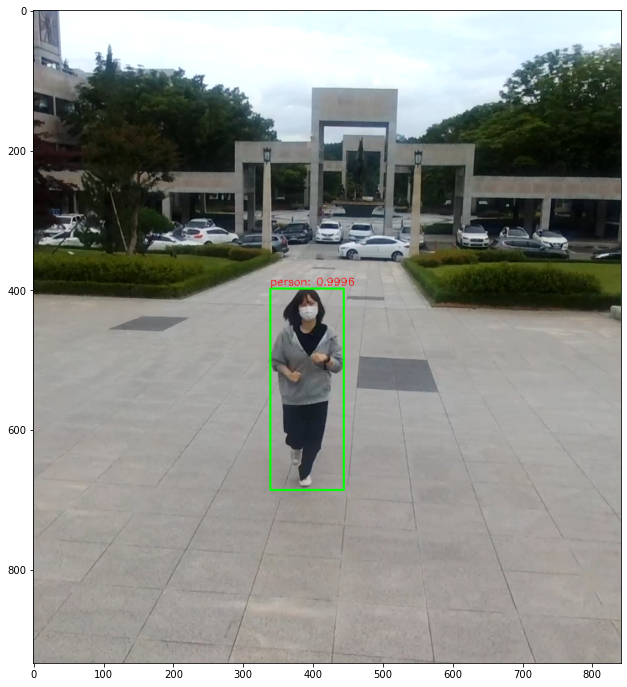

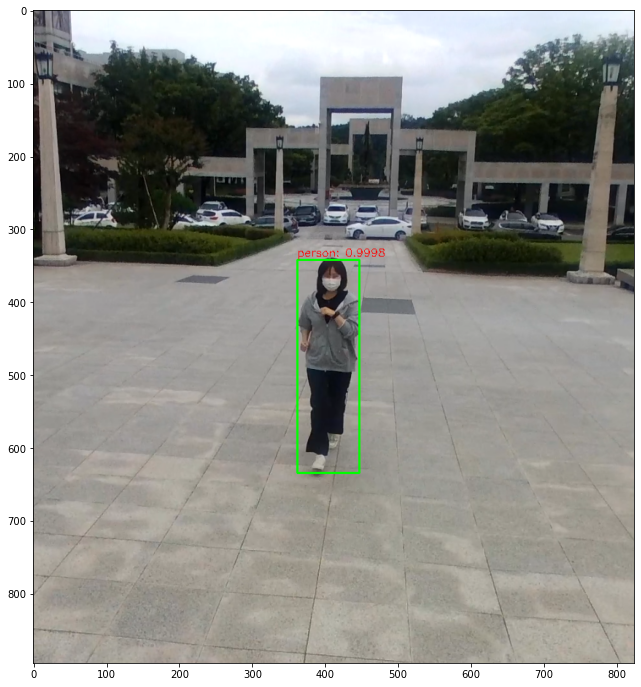

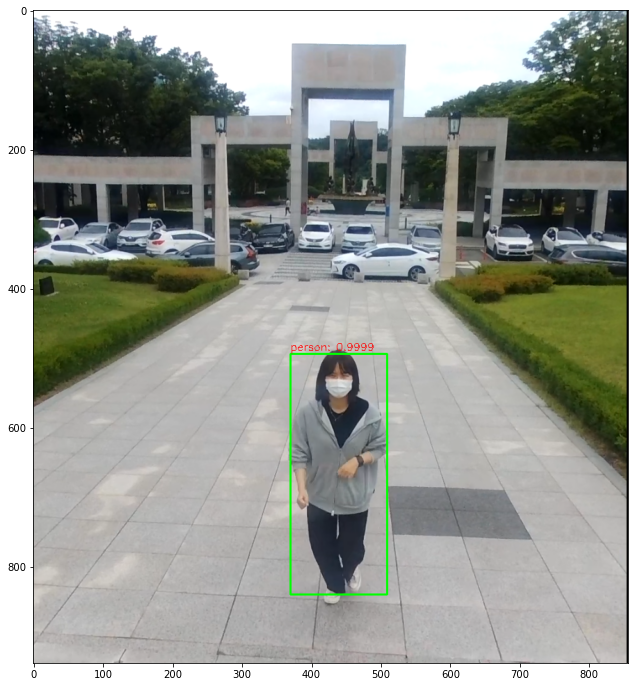

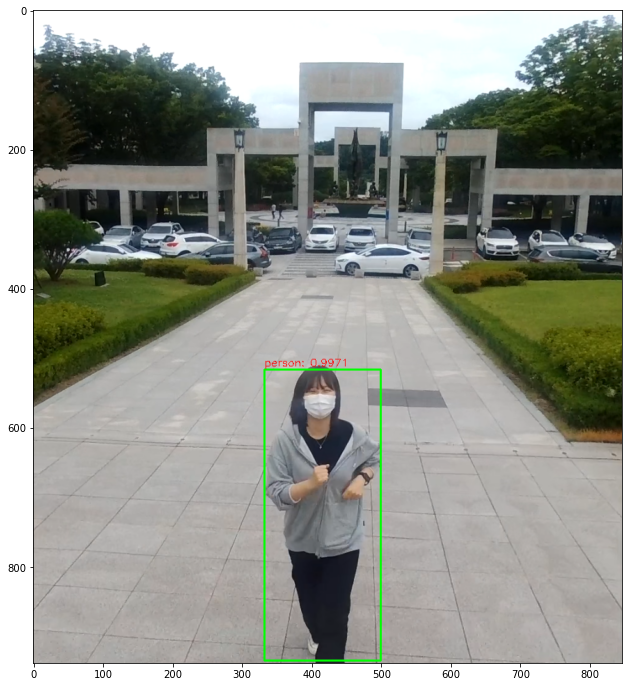

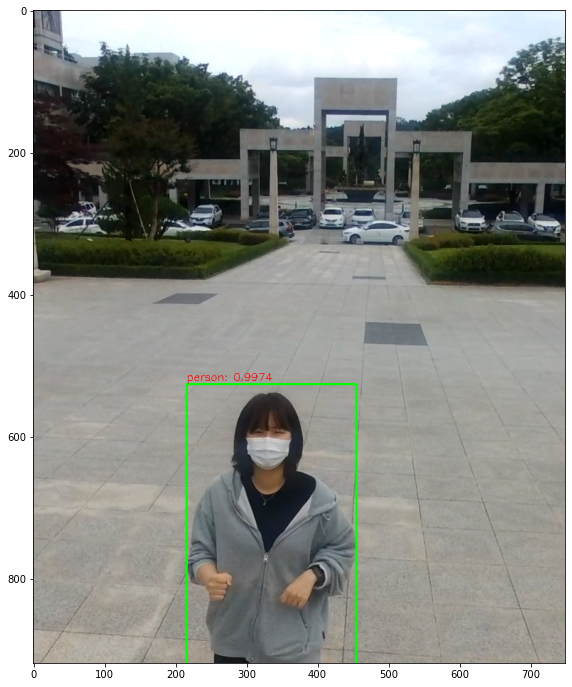

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time


# image 로드 
for i in range(1,6):
    img_num=str(i)
    root = "/home/piai/AI_project/drone_control/"
    filename=root+img_num+".png"
    print(filename)
    img = cv2.imread(filename)
#img2 = cv2.imread('/home/piai/AI_project/test.jpg')
#coco dataset 클래스명 매핑
    global width
    import os
    #가급적 절대 경로 사용. 
    CUR_DIR = os.path.abspath('.')
    weights_path = os.path.join(CUR_DIR, '/home/piai/AI_project/yolov3.weights')
    config_path =  os.path.join(CUR_DIR, '/home/piai/AI_project/yolov3.cfg')

    # tensorflow inference 모델 로딩
    cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

    conf_threshold = 0.5
    nms_threshold = 0.4
    # Object Detetion 수행 후 시각화 
    width_, draw_img=get_detected_img(cv_net_yolo, img, conf_threshold=conf_threshold, nms_threshold=nms_threshold, use_copied_array=True, is_print=True)
    #get_detected_img(cv_net_yolo, img2, conf_threshold=conf_threshold, nms_threshold=nms_threshold, use_copied_array=True, is_print=True)

    img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
    print(width_)
#     for i in widths:
#         if int(i)<50:
#             print("드론 속도 down")
#         elif int(i)<120 & int(i)>51:
#             print("드론 속도 유지")
#         else:
#             print("드론 속도 up")
    if width_<50:
        print("드론 속도 down")
    elif (width_<120 and width_>51):
        print("드론 속도 유지")
    else:
        print("드론 속도 up")
    plt.figure(figsize=(12, 12))
    plt.imshow(img_rgb)
